<a href="https://colab.research.google.com/github/Saraf-MS/Integer-Recognition/blob/main/ANN_IntegerRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WorkFlow of the document - 



1.   Import relevant libraries with proper version and check configuration . 
2.   Load data - using readily available  data .
3.   Split data for taining validation and testing .
4.   Checking shape , and visualize data .
5.   Out of 6000 trainning images 5000 utilized for validation . For testing 
     separate 10,000 images .
6.   Defining the layers for ANN and its details such as Activation function   of Nodes , name of layer .
7.   We need the model as the Squential details .
8.   Check summary to understand ANN details .
9.   Compile Model , for which define Loss function , optimizers and metrics .
10.  Train the model with training data define epochs number and validation data .
11.  Evalute trained model with validation data .
12.  Test the model with testing data .
13.  Convert the code in modular program .
    

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.6.0'

In [3]:
tf.keras.__version__

'2.6.0'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
mnist = tf.keras.datasets.mnist

In [7]:
(X_train_full ,  y_train_full) , (X_test , y_test) = mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

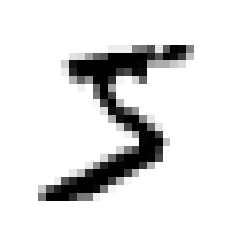

In [14]:
img = X_train_full[0]

plt.imshow(img , cmap="binary" )
plt.axis("off")
plt.show()

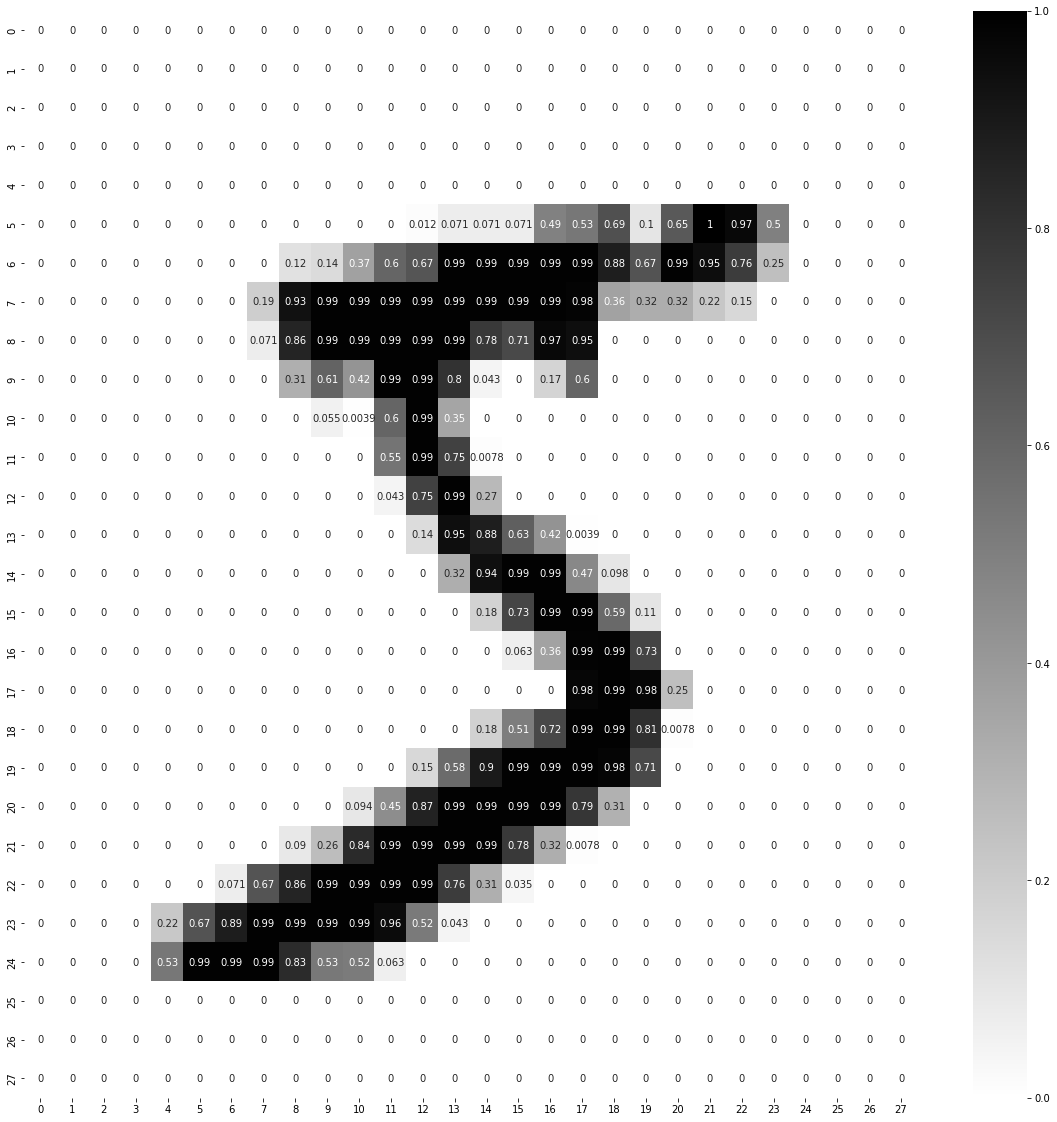

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap( img/255. , annot=True , cmap="binary")

In [20]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


X_test = X_test / 255.

In [22]:
Layers = [
          tf.keras.layers.Flatten(input_shape=[28 , 28] ,name="inputLayer"),
          tf.keras.layers.Dense(300 , activation="relu" , name="hiddenLayer1"),
          tf.keras.layers.Dense(100 , activation="relu" , name="hiddenLayer2"),
          tf.keras.layers.Dense(10 , activation="softmax" , name="outputLayer")            
]

In [24]:
model_clf = tf.keras.models.Sequential(Layers)

In [26]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
Loss_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER =  "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=Loss_FUNCTION , optimizer=OPTIMIZER , metrics=METRICS)

In [30]:
EPOCHS = 30
VALIDATION = (X_valid , y_valid)
history = model_clf.fit(X_train , y_train , epochs=EPOCHS, validation_data=VALIDATION)


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5987 - accuracy: 0.8449 - val_loss: 0.3059 - val_accuracy: 0.9134
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2869 - accuracy: 0.9177 - val_loss: 0.2411 - val_accuracy: 0.9316
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2332 - accuracy: 0.9337 - val_loss: 0.2009 - val_accuracy: 0.9448
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1989 - accuracy: 0.9435 - val_loss: 0.1733 - val_accuracy: 0.9498
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1740 - accuracy: 0.9505 - val_loss: 0.1532 - val_accuracy: 0.9578
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1542 - accuracy: 0.9557 - val_loss: 0.1426 - val_accuracy: 0.9624
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1386 - accuracy: 0.9601 - val_loss: 0.1293 - val_accuracy:

In [31]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.598694,0.844891,0.305869,0.9134
1,0.286859,0.917673,0.241058,0.9316
2,0.233187,0.933709,0.200945,0.9448
3,0.198890,0.943491,0.173253,0.9498
4,0.173968,0.950527,0.153211,0.9578
5,0.154188,0.955745,0.142641,0.9624
6,0.138570,0.960109,0.129297,0.9662
7,0.125303,0.964018,0.122046,0.9668
8,0.114191,0.967964,0.112797,0.9708
9,0.104895,0.970600,0.107713,0.9724


<function matplotlib.pyplot.show>

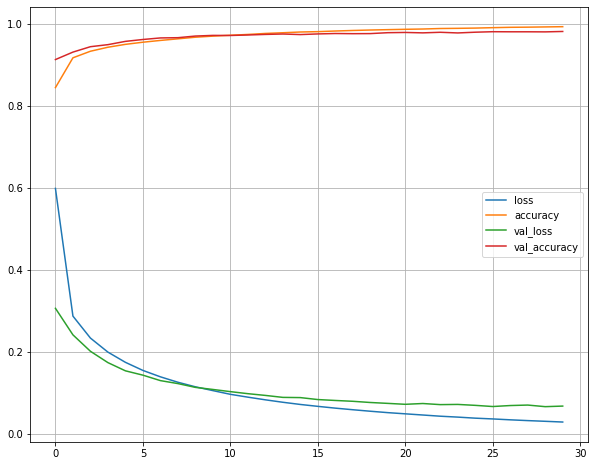

In [34]:
pd.DataFrame(history.history).plot(figsize=(10 ,8))
plt.grid(True)
plt.show

In [35]:
model_clf.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9778


[0.0722600519657135, 0.9778000116348267]

In [36]:
x_new = X_test[:3]

y_prob = model_clf.predict(x_new)

y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [38]:
y_prob.shape

(3, 10)

In [39]:
y_prob

array([[2.9212572e-07, 8.3871925e-08, 1.8351717e-05, 3.3195963e-04,
        1.2249086e-08, 2.3873824e-07, 1.3876643e-12, 9.9964237e-01,
        8.7797702e-07, 5.7104398e-06],
       [6.4065813e-07, 3.2697301e-04, 9.9965477e-01, 8.5189549e-06,
        8.2901646e-12, 4.7108475e-07, 1.3184799e-06, 6.9318428e-13,
        7.3368187e-06, 7.1008812e-14],
       [6.1251221e-06, 9.9785173e-01, 5.0320110e-04, 7.8741825e-05,
        3.4126671e-04, 2.7252103e-05, 7.6599565e-05, 6.3632400e-04,
        4.6900302e-04, 9.8321689e-06]], dtype=float32)

In [44]:
y_pred = np.argmax(y_prob  , axis=-1)
y_pred

array([7, 2, 1])

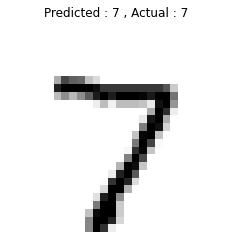

--------------------------------------------------------------------------------------------------------------------------------------------


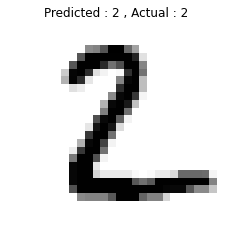

--------------------------------------------------------------------------------------------------------------------------------------------


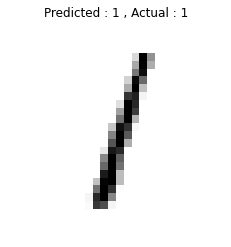

--------------------------------------------------------------------------------------------------------------------------------------------


In [46]:
for img_array , pred , actual in zip(x_new , y_pred , y_test[:3]):
  plt.imshow(img_array , cmap="binary")
  plt.title(f"Predicted : {pred} , Actual : {actual}")
  plt.axis("off")
  plt.show()
  print("-------"*20)